In [1]:
import ROOT as rt

Welcome to JupyROOT 6.24/02


In [2]:
input_file = rt.TFile("../online/output/mass.root")
input_list = input_file.Get("h-lambda")
c = rt.TCanvas("main", "Main", 0, 10, 1920, 1080)

In [3]:
single_dist = input_list.FindObject("fLambdaDist")
triggered_single_dist = input_list.FindObject("fTriggeredLambdaDist")

cor_dist = input_list.FindObject("fDphiHLambda")
rot_cor_dist = input_list.FindObject("fDphiHLambdaRotated")
ls_cor_dist = input_list.FindObject("fDphiHLambdaLS")

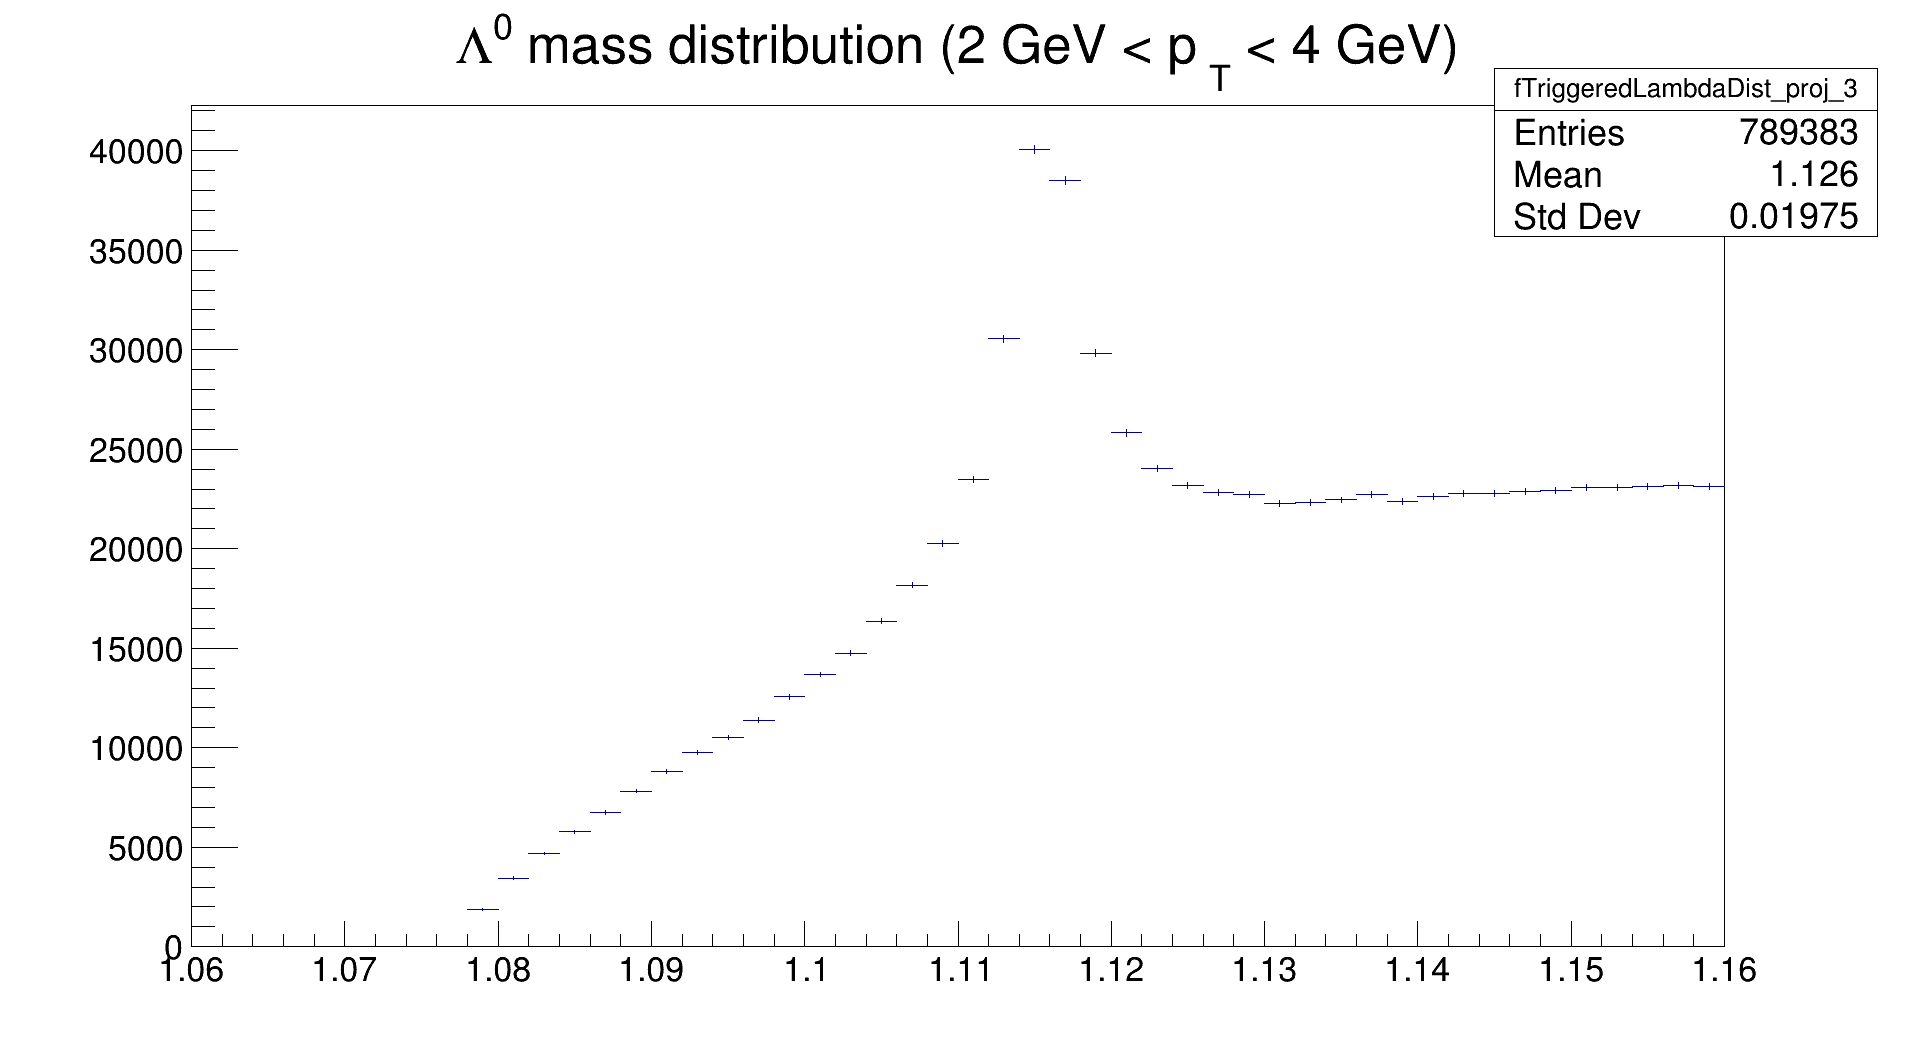

In [4]:
triggered_single_dist.GetAxis(0).SetRangeUser(2, 4)
mass_dist = triggered_single_dist.Projection(3)
mass_dist.Sumw2()
mass_dist.SetTitle("#Lambda^{0} mass distribution (2 GeV < p_{T} < 4 GeV)")
mass_dist.Rebin(2)
mass_dist.Draw()
c.Draw()

In [ ]:
fit = rt.TF1("fit", "[0]*TMath::Voigt(x - [1], [2], [3], 4) + pol2(4)", 1.09, 1.14)
fit.SetParameter(0, 10000)
fit.SetParameter(1, 1.115)
fit.SetParameter(2, 0.003)
fit.SetParameter(3, 0.003)
fit.SetParameter(4, -891470)
fit.SetParameter(5, 916596.5)
fit.SetParameter(6, -728070)

In [ ]:
mass_dist.Fit(fit, "R")
mass_dist.Draw()
c.Draw()

In [5]:
single_dist.GetAxis(0).SetRangeUser(2, 4)
triggered_single_dist.GetAxis(0).SetRangeUser(2, 4)

cor_dist.GetAxis(0).SetRangeUser(4, 8)
cor_dist.GetAxis(1).SetRangeUser(2, 4)

ls_cor_dist.GetAxis(0).SetRangeUser(4, 8)
ls_cor_dist.GetAxis(1).SetRangeUser(2, 4)

rot_cor_dist.GetAxis(0).SetRangeUser(4, 8)
rot_cor_dist.GetAxis(1).SetRangeUser(2, 4)

In [6]:
mass_dist = single_dist.Projection(3).Clone("mass_dist")
triggered_mass_dist = triggered_single_dist.Projection(3).Clone("triggered_mass_dist")
cor_mass_dist = cor_dist.Projection(4).Clone("cor_mass_dist")
ls_cor_mass_dist = ls_cor_dist.Projection(4).Clone("ls_cor_mass_dist")
rot_cor_mass_dist = rot_cor_dist.Projection(4).Clone("rot_cor_mass_dist")

Warning in <TFile::Append>: Replacing existing TH1: fTriggeredLambdaDist_proj_3 (Potential memory leak).


In [7]:
mass_dist.Sumw2()
mass_dist.SetTitle("Single-particle #Lambda^{0} candidate mass distribution (2 GeV < p_{T} < 4 GeV)") 
mass_dist.GetXaxis().SetTitle("Mass (GeV)")
mass_dist.GetYaxis().SetTitle("dN_{p-#pi}/dM")
mass_dist.SetLineColor(rt.kBlue)

In [8]:
triggered_mass_dist.Sumw2()
triggered_mass_dist.SetTitle("Triggered #Lambda^{0} candidate mass distribution (2 GeV < p_{T} < 4 GeV)") 
triggered_mass_dist.GetXaxis().SetTitle("Mass (GeV)")
triggered_mass_dist.GetYaxis().SetTitle("dN_{p-#pi}/dM")
triggered_mass_dist.SetLineColor(rt.kRed)

In [9]:
cor_mass_dist.Sumw2()
cor_mass_dist.SetTitle("h-#Lambda^{0} candidate mass distribution (2 GeV < p_{T} < 4 GeV)") 
cor_mass_dist.GetXaxis().SetTitle("Mass (GeV)")
cor_mass_dist.GetYaxis().SetTitle("dN_{p-#pi}/dM")
cor_mass_dist.SetLineColor(rt.kBlue)

In [10]:
ls_cor_mass_dist.Sumw2()
ls_cor_mass_dist.SetTitle("h-#Lambda^{0} LS candidate mass distribution (2 GeV < p_{T} < 4 GeV)") 
ls_cor_mass_dist.GetXaxis().SetTitle("Mass (GeV)")
ls_cor_mass_dist.GetYaxis().SetTitle("dN_{p-#pi}/dM")
ls_cor_mass_dist.SetLineColor(rt.kBlue)

In [11]:
rot_cor_mass_dist.Sumw2()
rot_cor_mass_dist.SetTitle("h-#Lambda^{0} rotated daughter candidate mass distribution (2 GeV < p_{T} < 4 GeV)") 
rot_cor_mass_dist.GetXaxis().SetTitle("Mass (GeV)")
rot_cor_mass_dist.GetYaxis().SetTitle("dN_{p-#pi}/dM")
rot_cor_mass_dist.SetLineColor(rt.kMagenta)

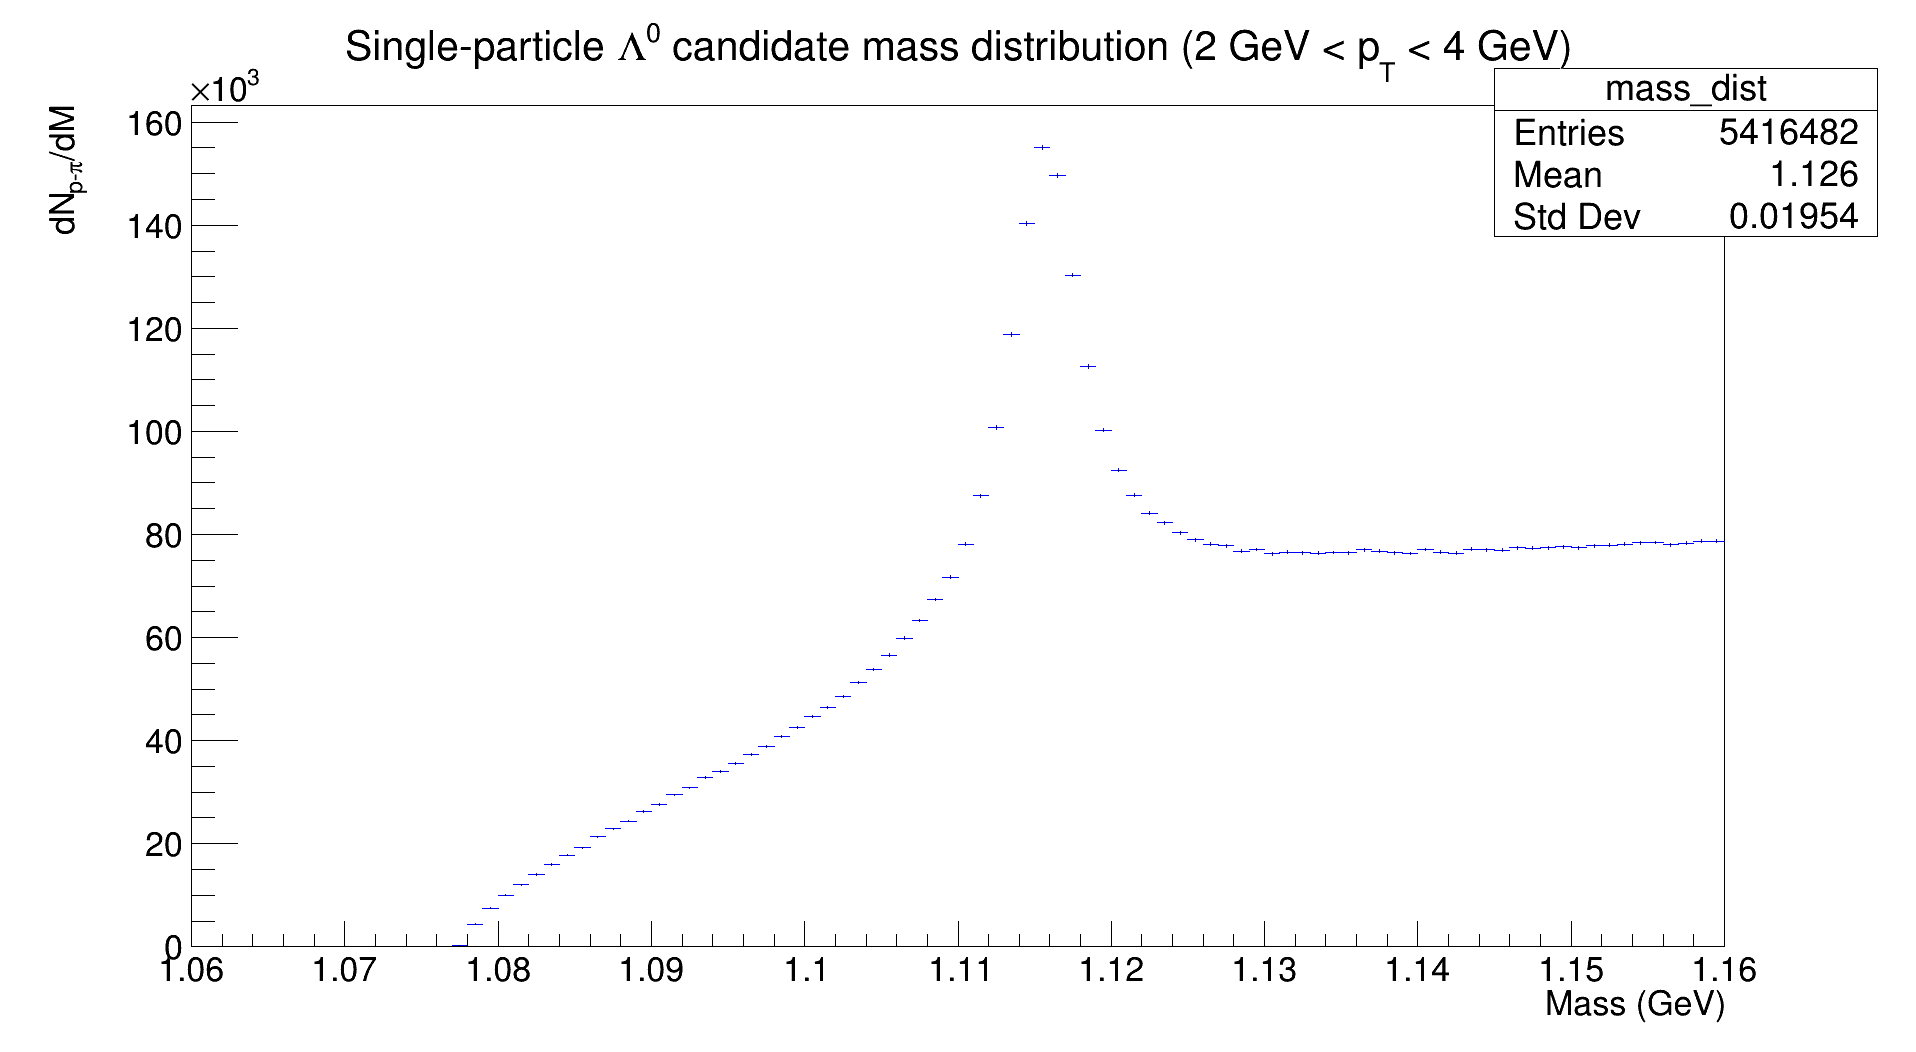

In [12]:
mass_dist.Draw()
c.Draw()

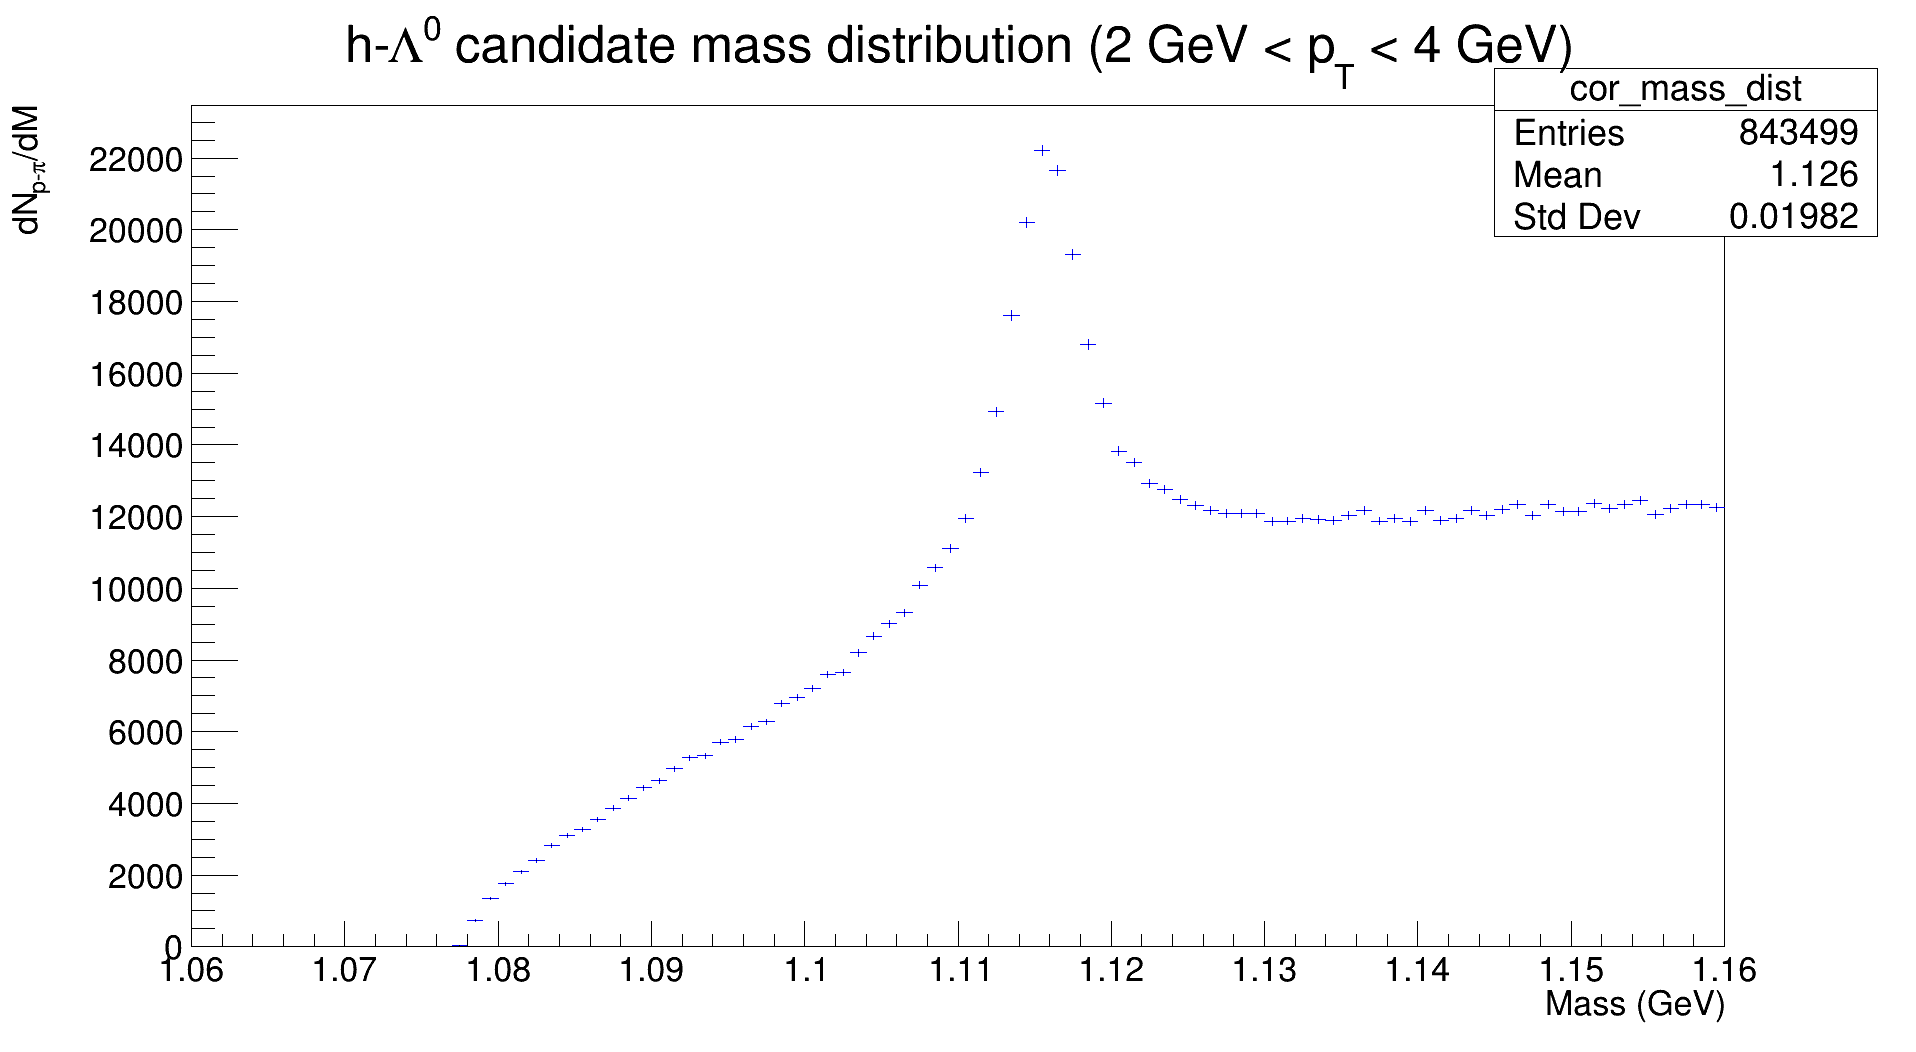

In [13]:
cor_mass_dist.Draw()
c.Draw()

In [14]:
rot_cor_mass_dist.Rebin(2)
triggered_mass_dist.Rebin(2)

<ROOT.TH1D object ("triggered_mass_dist") at 0x7fe903428280>

In [15]:
ls_cor_mass_dist.Rebin(2)

<ROOT.TH1D object ("ls_cor_mass_dist") at 0x7fe9035b2670>

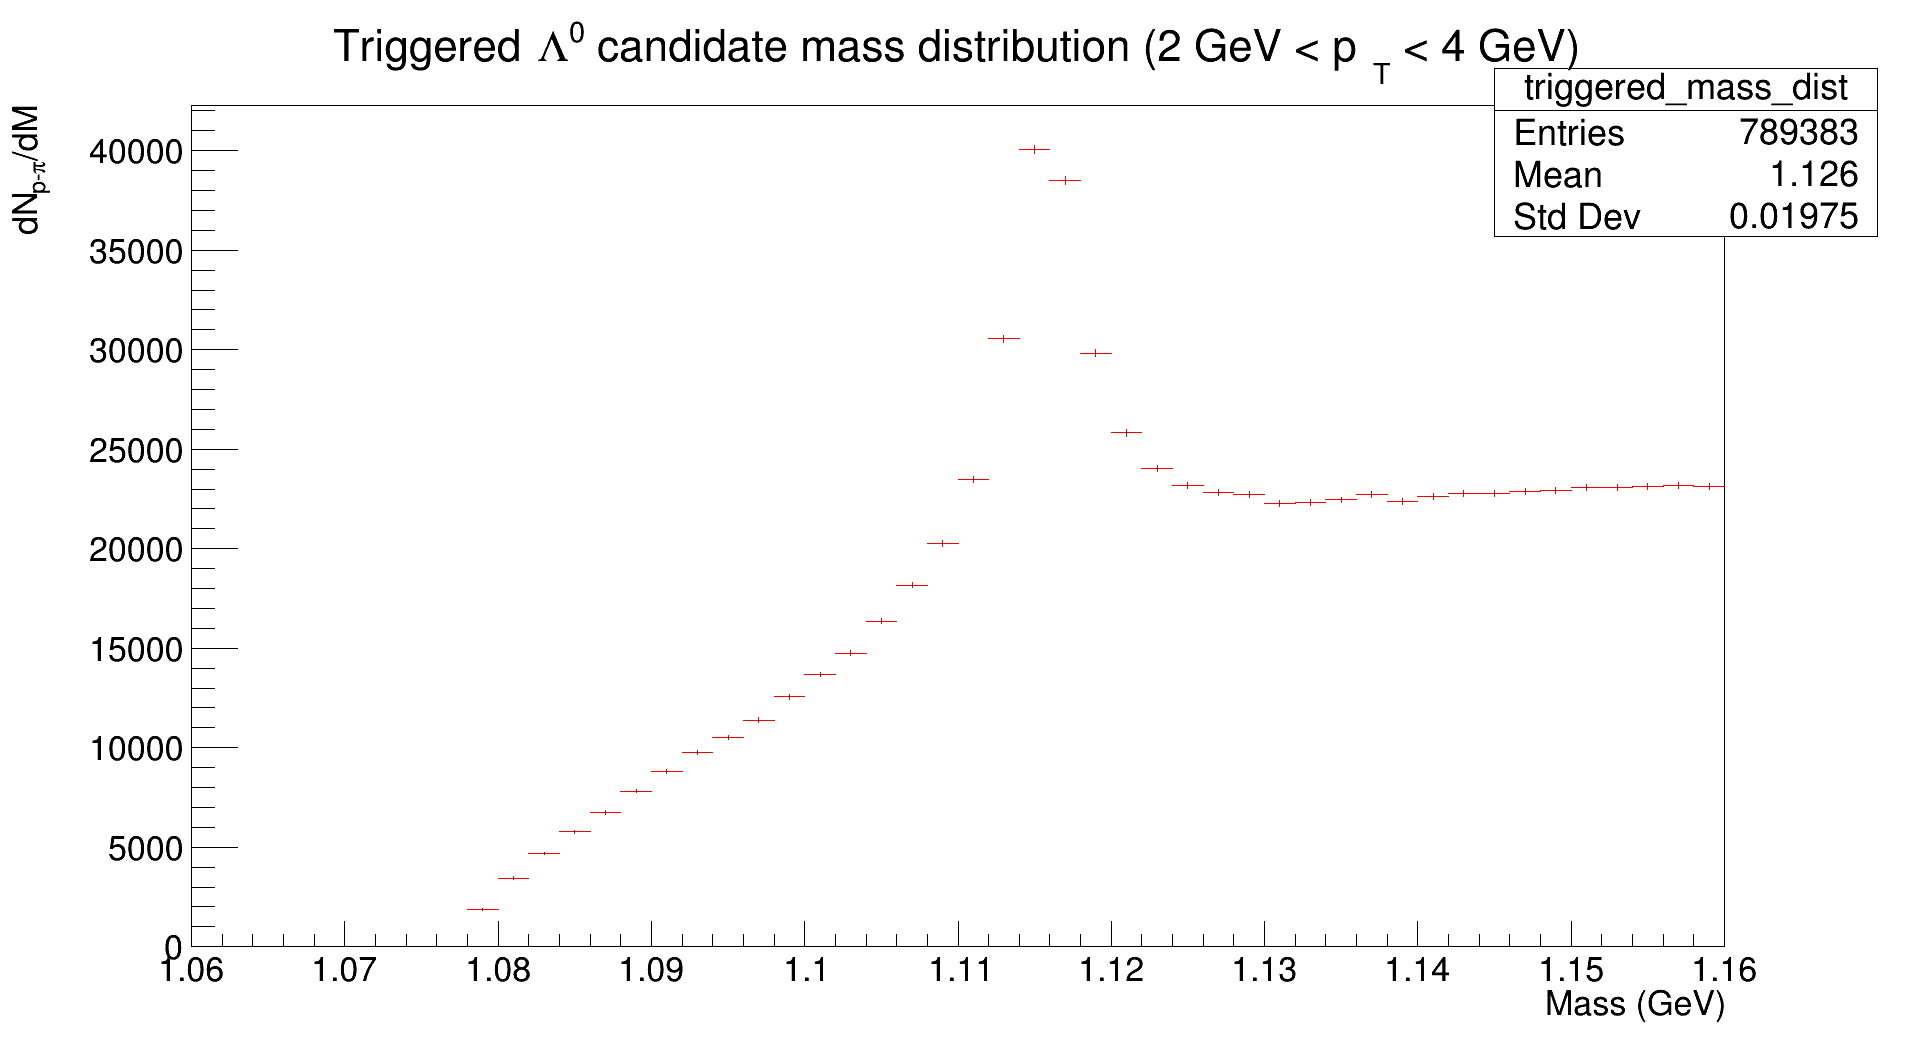

In [16]:
triggered_mass_dist.Draw()
c.Draw()

In [17]:
left_bin_val = 1.08
right_bin_val = 1.1
left_bin = triggered_mass_dist.FindBin(left_bin_val)
right_bin = triggered_mass_dist.FindBin(right_bin_val)

rot_cor_mass_dist.Scale(1/rot_cor_mass_dist.Integral())
ls_cor_mass_dist.Scale(1/ls_cor_mass_dist.Integral())
print(right_bin)
og_int = triggered_mass_dist.Integral(left_bin, right_bin)
rot_int = rot_cor_mass_dist.Integral(left_bin, right_bin)
ls_int = ls_cor_mass_dist.Integral(left_bin, right_bin)
print(og_int, triggered_mass_dist.Integral())

rot_scale_factor = og_int/rot_int
ls_scale_factor = og_int/ls_int
rot_cor_mass_dist.Scale(rot_scale_factor)
ls_cor_mass_dist.Scale(ls_scale_factor)

21
95197.0 789383.0


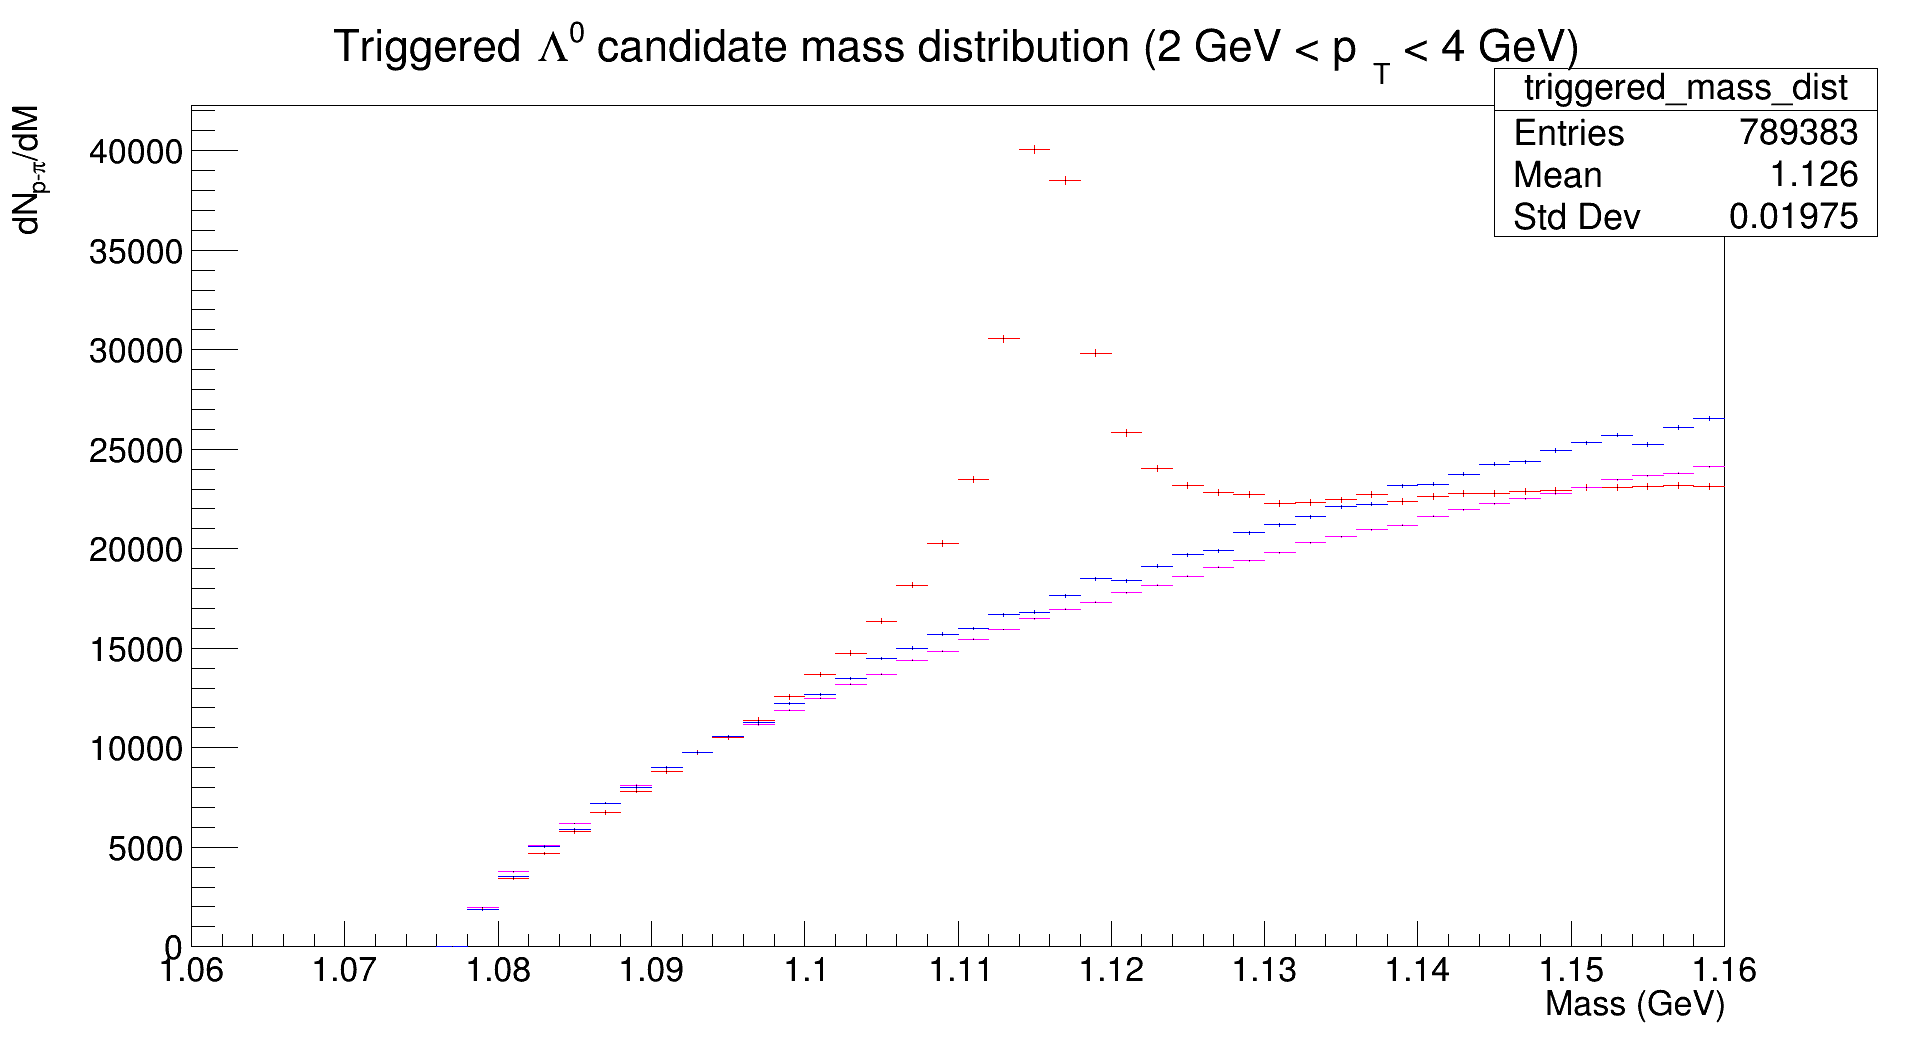

In [18]:
triggered_mass_dist.Draw()
rot_cor_mass_dist.Draw("SAME")
ls_cor_mass_dist.Draw("SAME")
c.Draw()

In [ ]:
rot_cor_mass_dist.Draw()
c.Draw()

In [ ]:
mass_dist.Rebin(2)


****************************************
Minimizer is Linear / Migrad
Chi2                      =      8346.81
NDf                       =           32
p0                        = -3.87973e+06   +/-   10671.9     
p1                        =  6.72485e+06   +/-   19214       
p2                        = -2.89719e+06   +/-   8645.8      


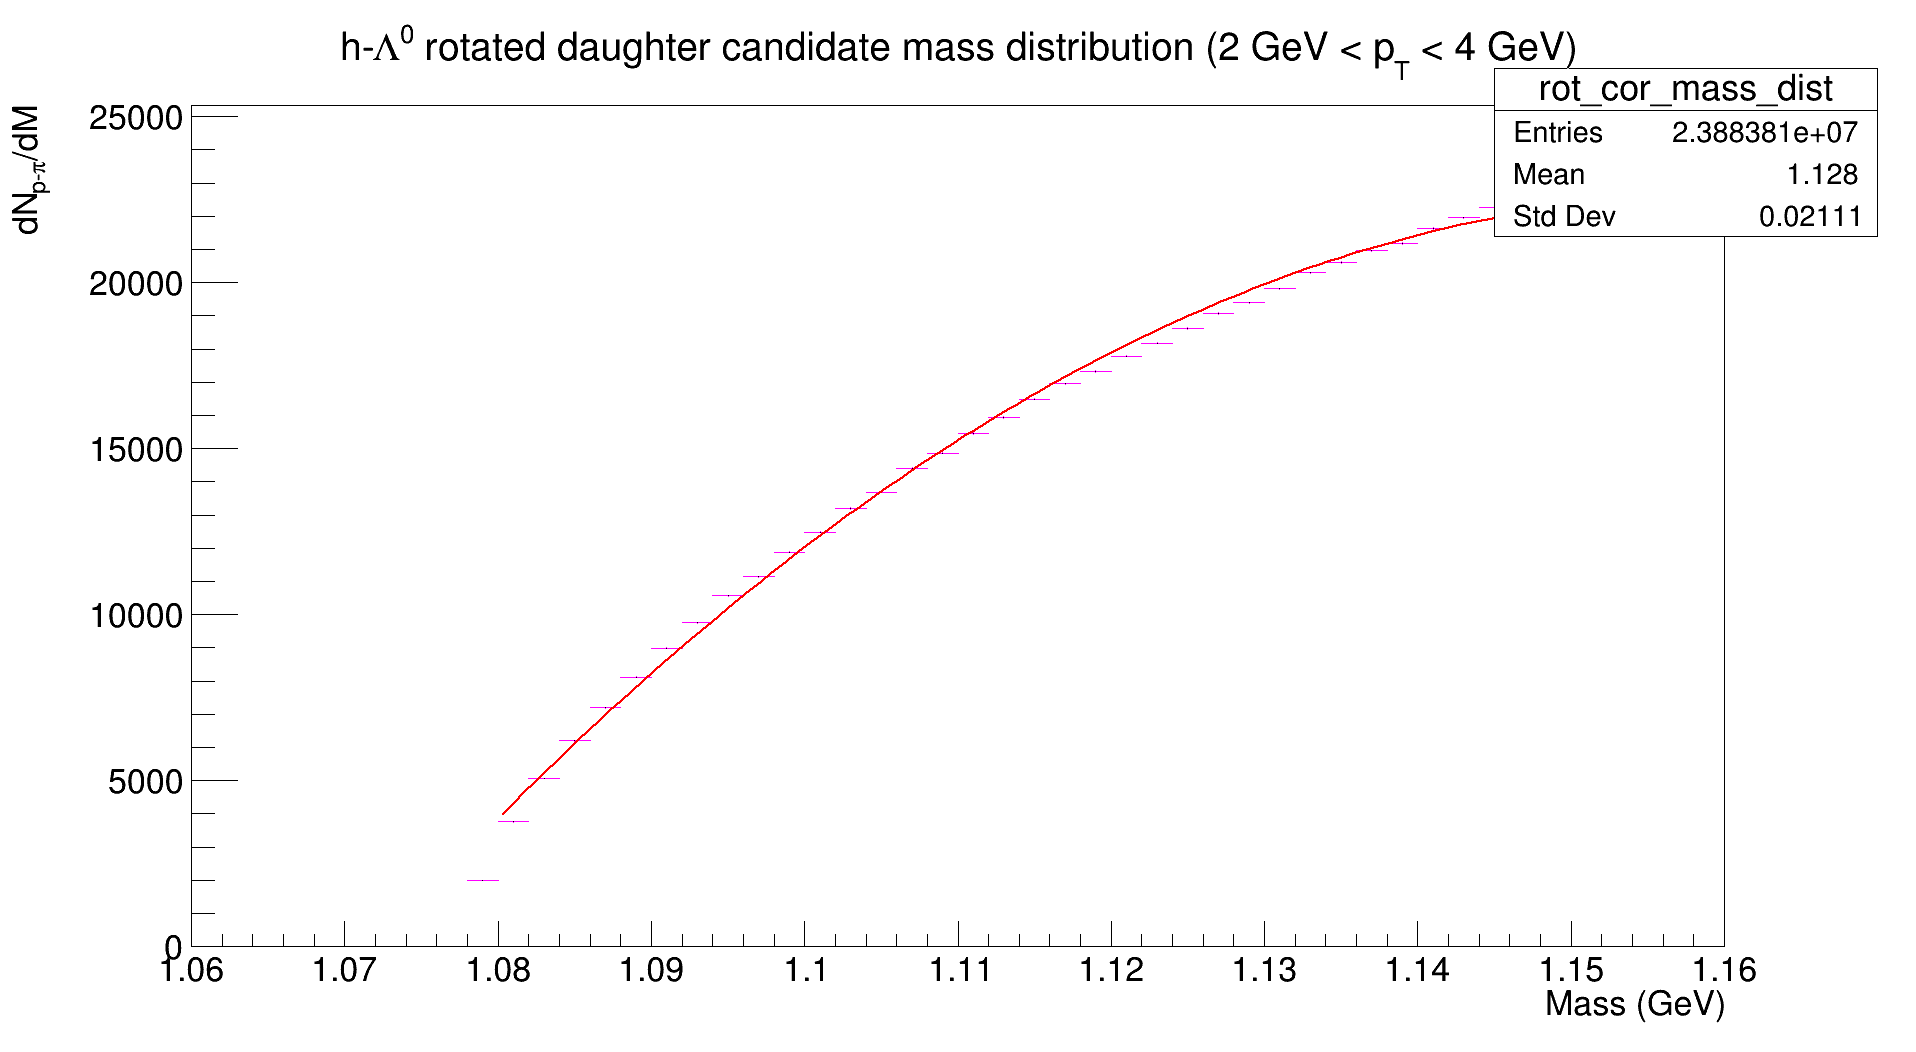

In [19]:
bg_fit = rt.TF1("bg_fit", "pol2", 1.08, 1.15)
rot_cor_mass_dist.Fit(bg_fit, "RS")
rot_cor_mass_dist.Draw()
c.Draw()

In [46]:
g_fit.Delete()

In [47]:
# g_fit = rt.TF1("g_fit", "gaus(0) + pol3(3)", 1.1, 1.14)
# g_fit = rt.TF1("g_fit", "gaus(0) + pol2(3)", 1.085, 1.15)
full_g_fit = rt.TF1("g_fit", "gaus(0) + pol4(3)", 1.08, 1.16)
g_fit = rt.TF1("v_fit", "[0]*TMath::Voigt(x - [1], [2], [3], 4) + pol2(4)", 1.09, 1.15)

In [48]:
g_fit.SetNpx(1000)
g_fit.SetParameter(0, 18000)
g_fit.FixParameter(1, 1.1155)
g_fit.SetParameter(2, 0.002)
g_fit.SetParameter(3, 0.002)
g_fit.SetParameter(4, bg_fit.GetParameter(0))
g_fit.SetParameter(5, bg_fit.GetParameter(1))
g_fit.SetParameter(6, bg_fit.GetParameter(2))

In [49]:
triggered_mass_dist.Fit(g_fit, "RS")

 FCN=204.187 FROM HESSE     STATUS=NOT POSDEF     50 CALLS         718 TOTAL
                     EDM=1.68738e-11    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.29815e+02   4.47373e-06   1.62791e-03   6.48294e-06
   2  p1           1.11550e+00     fixed    
   3  p2           1.19963e-05   1.38566e+00   9.45255e-06  -2.25195e-06
   4  p3           6.32950e-03   4.21594e-05   1.32750e-08   6.38122e-02
   5  p4          -6.13408e+06   4.47372e-06   1.46248e+00  -4.10749e-07
   6  p5           1.07371e+07   4.47372e-06   2.55993e+00  -4.82486e-07
   7  p6          -4.68132e+06   4.47372e-06   1.11611e+00  -5.65862e-07


In [56]:
new_bg_fit = rt.TF1("new_bg_fit", "pol2", 1.09, 1.15)
new_bg_fit.SetParameter(0, g_fit.GetParameter(4))
new_bg_fit.SetParameter(1, g_fit.GetParameter(5))
new_bg_fit.SetParameter(2, g_fit.GetParameter(6))

In [62]:
voigt_data = rt.TF1("voigt_data", "[0]*TMath::Voigt(x - [1], [2], [3], 4)", 1.06, 1.16)
voigt_data.SetLineColor(rt.kBlue)
voigt_data.SetTitle("Voigt fit from data (blue) and MC (magenta)")
voigt_data.SetNpx(1000)
voigt_data.SetParameter(0, 1)
voigt_data.SetParameter(1, g_fit.GetParameter(1))
voigt_data.SetParameter(2, g_fit.GetParameter(2))
voigt_data.SetParameter(3, g_fit.GetParameter(3))

In [63]:
voigt_mc = rt.TF1("voigt_mc", "[0]*TMath::Voigt(x - [1], [2], [3], 4)", 1.06, 1.16)
voigt_mc.SetLineColor(rt.kMagenta)
voigt_mc.SetNpx(1000)
voigt_mc.SetParameter(0, 1)
voigt_mc.SetParameter(1, 1.11575e+00)
voigt_mc.SetParameter(2, 8.63717e-08)
voigt_mc.SetParameter(3, 6.50149e-03)

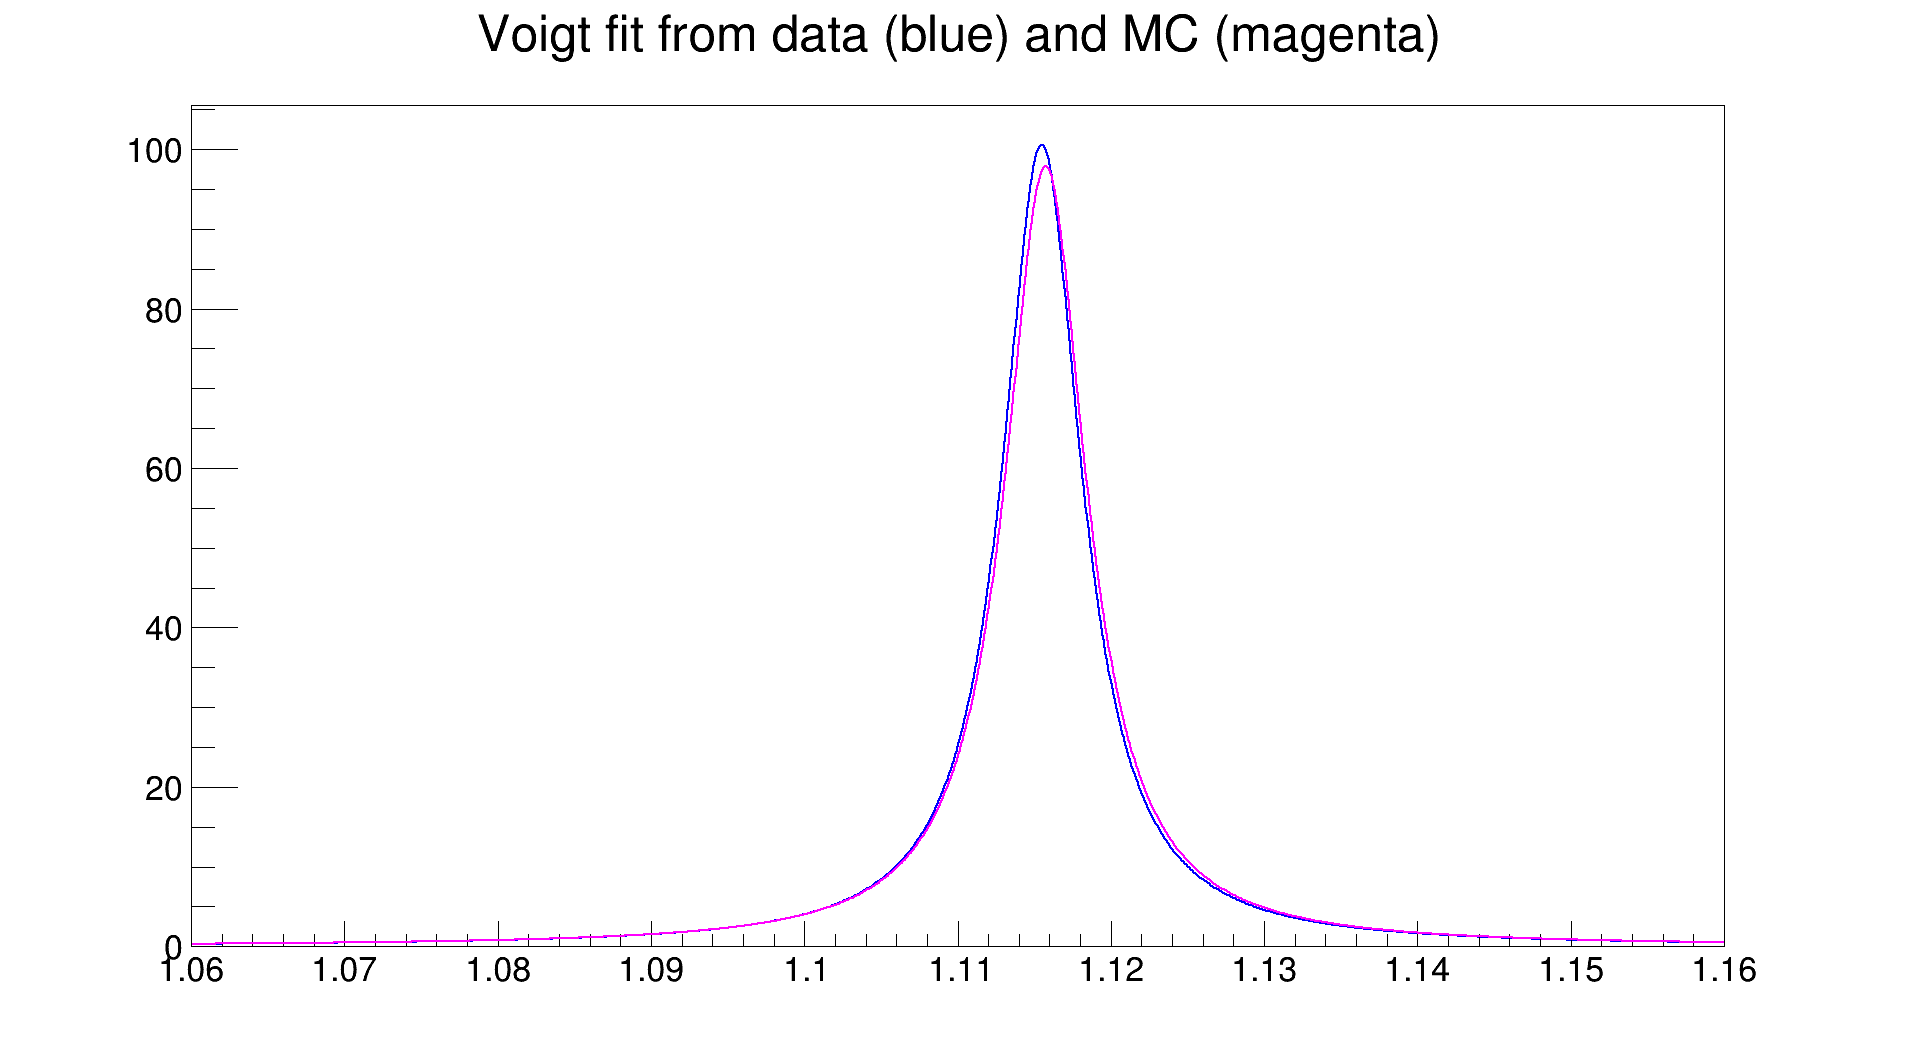

In [64]:
voigt_data.Draw()
voigt_mc.Draw("SAME")
c.Draw()

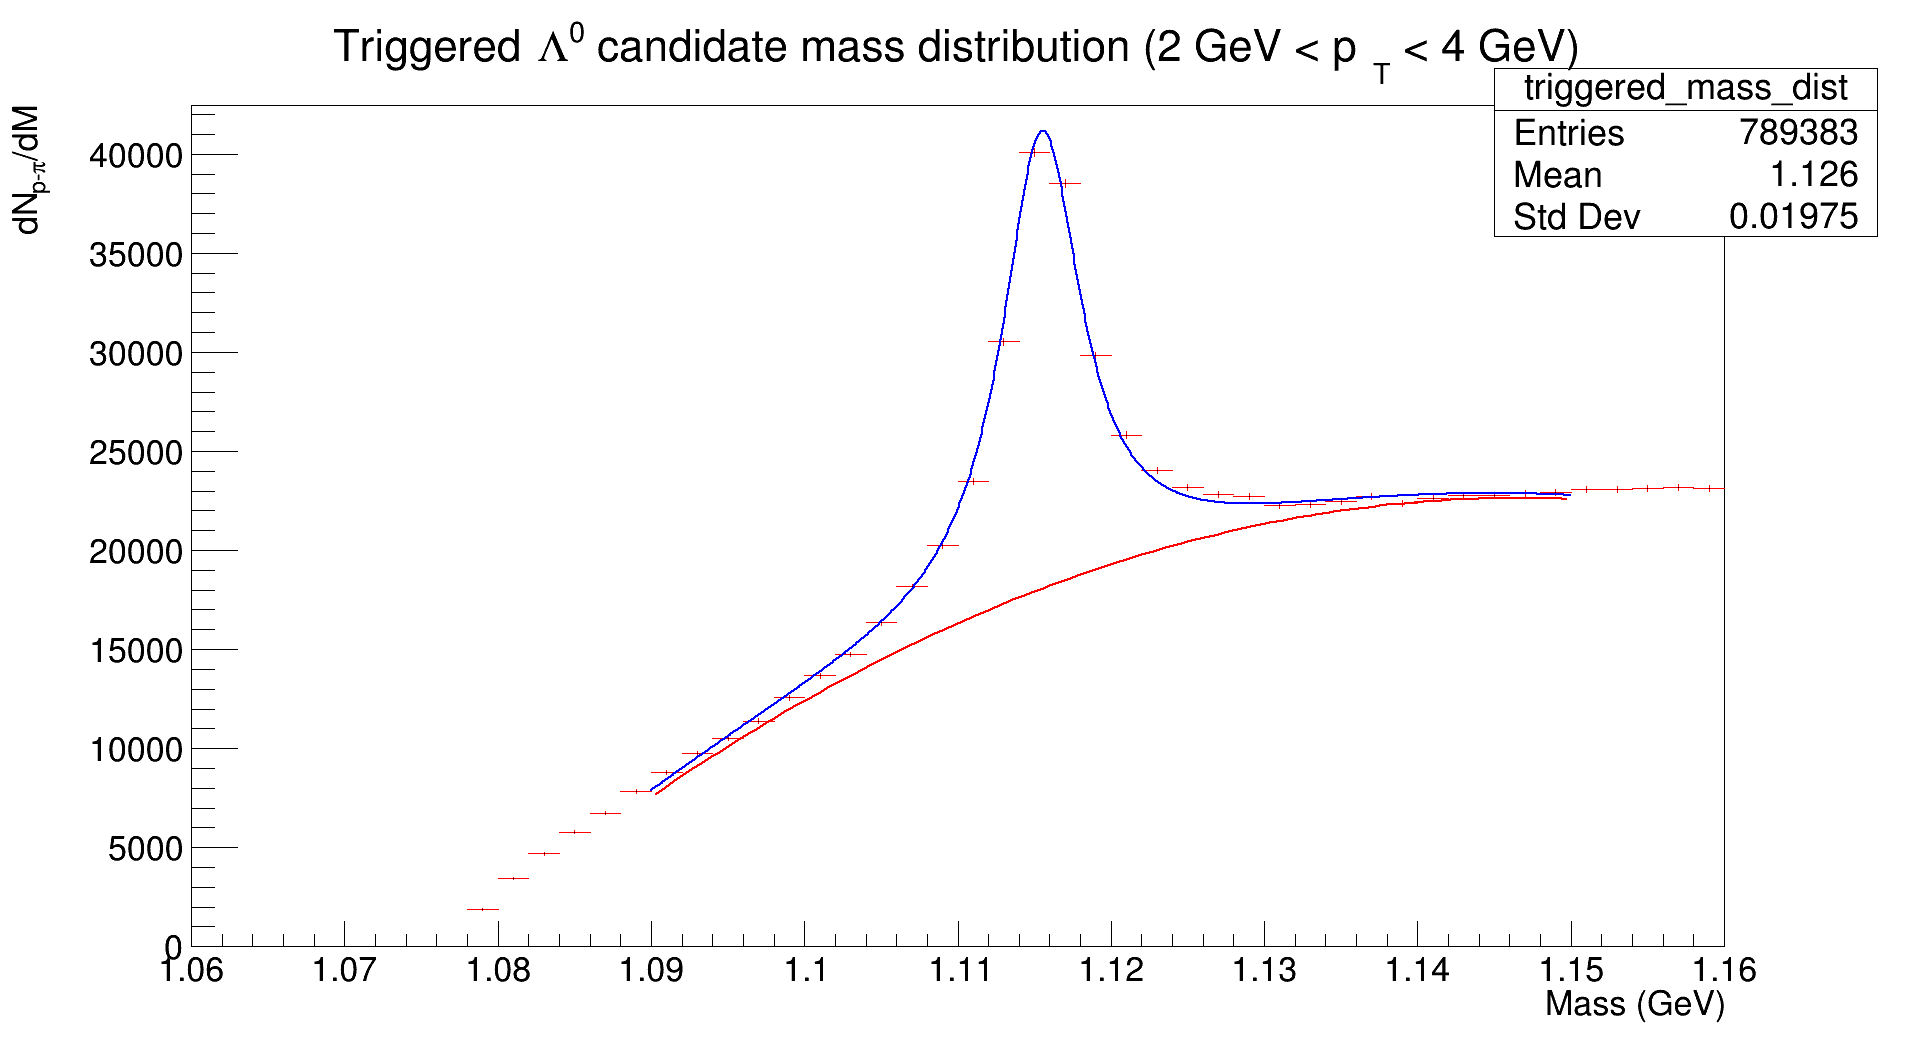

In [57]:
g_fit.SetLineColor(rt.kBlue)
triggered_mass_dist.Draw()
g_fit.Draw("SAME")
new_bg_fit.Draw("SAME")
c.Draw()

In [54]:
full_g_fit.SetParameter(0, g_fit.GetParameter(0))
full_g_fit.SetParameter(1, g_fit.GetParameter(1))
full_g_fit.SetParameter(2, g_fit.GetParameter(2))
full_g_fit.SetParameter(3, g_fit.GetParameter(3))
full_g_fit.SetParameter(4, g_fit.GetParameter(4))
full_g_fit.SetParameter(5, g_fit.GetParameter(5))
full_g_fit.SetParameter(6, g_fit.GetParameter(6))
full_g_fit.SetParameter(7, g_fit.GetParameter(7))

Error in <TFormula::GetParameter>: wrong index used - use GetParameter(name)


In [ ]:
bin_1 = mass_dist.FindBin(1.09)
bin_2 = mass_dist.FindBin(1.10)
bin_3 = mass_dist.FindBin(1.14)

print(mass_dist.GetBinContent(bin_1))
print(mass_dist.GetBinContent(bin_2))
print(mass_dist.GetBinContent(bin_3))

In [ ]:
mass_dist.Draw()
full_g_fit.Draw("SAME")
c.Draw()

In [ ]:
breit_wigner = rt.TF1("bw_contribution", "TMath::BreitWigner(x, 0, 6.53606e-3)", -0.1, 0.1)
gaussian = rt.TF1("gaussian_contribution", "TMath::Gaus(x, 0, 4.15882e-6, true)", -0.1, 0.1)

In [ ]:
breit_wigner.SetNpx(1000000)
gaussian.SetNpx(100000)
breit_wigner.SetTitle("Breit-Wigner (blue) vs. Gaus (red)")
breit_wigner.SetLineColor(rt.kBlue)
gaussian.SetLineColor(rt.kRed)

In [ ]:
breit_wigner.Draw()
gaussian.Draw("SAME")
c.Draw()